In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tesser import cython_sr
from tesser import cython_fit
from tesser import util
import importlib

In [2]:
data_dir= "/mnt/c/Users/rodv2/Dropbox/tesser_successor/Data"

In [3]:
induct_all = util.load_induct(data_dir)
struct_all = util.load_struct(data_dir)

subj_filter = f'SubjNum == {138}'
induct_df = induct_all.query(subj_filter)
struct_df = struct_all.query(subj_filter)

n_states = len(np.unique(struct_df.objnum))

Find actual trasnsition matrix for each participant using strductred learning DataFrame.
* use objnum to create new matrix
* tally each object transition as a matrix index
* devide each row by the sum of the row
  *  each row must sum up to 1

In [4]:
df=struct_df.reset_index()
df =df.objnum
matrix = np.zeros([n_states, n_states])
for i, j in enumerate(df):
    try:
        matrix[j-1,df[i+1]-1] +=1
    except:
        KeyError
# print(matrix)
matrix[matrix == 0] = 0.0000001
# print(matrix)
for row in range(n_states):
    matrix[row] /= np.sum(matrix[row])


In [5]:
df=struct_df.reset_index()
df =df.objnum
matrix = np.zeros([n_states, n_states])
for i, j in enumerate(df):
    try:
        matrix[j-1,df[i+1]-1] +=1
    except:
        KeyError
# print(matrix)
matrix[matrix == 0] = 0.0000001
# print(matrix)
for row in range(n_states):
    matrix[row] /= np.sum(matrix[row])

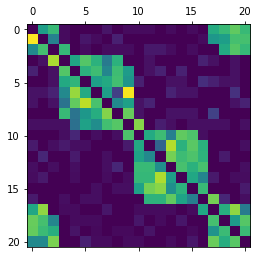

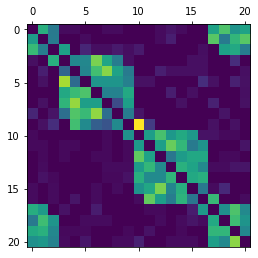

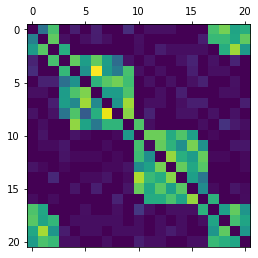

In [6]:
plt.matshow(matrix), plt.matshow(cython_sr.transition_indiv(util.load_struct_subject(data_dir,108),n_states));
plt.matshow(cython_sr.transition_all(struct_all,n_states)[101])

In [7]:
true_t =cython_sr.transition_all(struct_all,n_states)

In [11]:
true_t

{100: array([[0.        , 0.14569536, 0.17880795, 0.00662252, 0.        ,
         0.00662252, 0.        , 0.        , 0.01324503, 0.00662252,
         0.        , 0.        , 0.        , 0.01324503, 0.00662252,
         0.        , 0.        , 0.16556291, 0.17880795, 0.13907285,
         0.13907285],
        [0.17197452, 0.        , 0.1910828 , 0.00636943, 0.        ,
         0.00636943, 0.        , 0.        , 0.        , 0.        ,
         0.00636943, 0.        , 0.00636943, 0.        , 0.        ,
         0.        , 0.00636943, 0.1656051 , 0.15923567, 0.14649682,
         0.13375796],
        [0.1483871 , 0.18064516, 0.        , 0.1483871 , 0.00645161,
         0.00645161, 0.        , 0.        , 0.        , 0.        ,
         0.01290323, 0.00645161, 0.        , 0.        , 0.01935484,
         0.00645161, 0.        , 0.        , 0.11612903, 0.18709677,
         0.16129032],
        [0.        , 0.        , 0.20183486, 0.        , 0.11926606,
         0.19266055, 0.12844037,

In [8]:
fixed = {}
var_names = ['gamma', 'alpha', 'tau', 'w']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10], 'w' : [0, 1]}
results = cython_fit.fit_induct_indiv(struct_all, induct_all, fixed, var_names, var_bounds,
                               n_states=n_states, verbose=False, model_type='true transitional', model=true_t)

Estimating parameters for 100...


KeyError: 0

In [ ]:
import importlib

In [ ]:
importlib.reload(cython_fit)

In [ ]:
results=results.set_index('subject')

In [ ]:
cython_fit.plot_by_question(struct_all, induct_all, results,
                            fig_name='true transitional',model_type= 'true transitional',model=true_t)

In [ ]:
results